In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"/content/training-project.csv")

In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,20
Victim Age,19
Victim Gender,17
Weapon Used,5807


In [ ]:
df['Date Case Closed'] = df['Date Case Closed'].fillna('Not Closed Yet')

In [ ]:

crime_age_median = {}

for crime in df['Crime Description'].unique():
    median_age = df[df['Crime Description'] == crime]['Victim Age'].median()
    if not pd.isnull(median_age):
        crime_age_median[crime] = median_age

for i in range(len(df)):
    if pd.isnull(df.loc[i, 'Victim Age']):
        crime = df.loc[i, 'Crime Description']
        if crime in crime_age_median:
            df.loc[i, 'Victim Age'] = crime_age_median[crime]


In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,20
Victim Age,0
Victim Gender,17
Weapon Used,5807


In [ ]:

crime_weapon_mode = {}

for crime in df['Crime Description'].unique():
    mode_weapon = df[df['Crime Description'] == crime]['Weapon Used'].mode()
    if not mode_weapon.empty:
        crime_weapon_mode[crime] = mode_weapon[0]

for i in range(len(df)):
    if pd.isnull(df.loc[i, 'Weapon Used']):
        crime = df.loc[i, 'Crime Description']
        if crime in crime_weapon_mode:
            df.loc[i, 'Weapon Used'] = crime_weapon_mode[crime]


In [ ]:
df.isnull().sum()


,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,20
Victim Age,0
Victim Gender,17
Weapon Used,2


In [ ]:

crime_gender_mode = {}

for crime in df['Crime Description'].unique():
    mode_gender = df[df['Crime Description'] == crime]['Victim Gender'].mode()
    if not mode_gender.empty:
        crime_gender_mode[crime] = mode_gender[0]

for i in range(len(df)):
    if pd.isnull(df.loc[i, 'Victim Gender']):
        crime = df.loc[i, 'Crime Description']
        if crime in crime_gender_mode:
            df.loc[i, 'Victim Gender'] = crime_gender_mode[crime]


In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,20
Victim Age,0
Victim Gender,0
Weapon Used,2


In [ ]:

weapon_crime_mode = {}

for weapon in df['Weapon Used'].unique():
    mode_crime = df[df['Weapon Used'] == weapon]['Crime Description'].mode()
    if not mode_crime.empty:
        weapon_crime_mode[weapon] = mode_crime[0]

for i in range(len(df)):
    if pd.isnull(df.loc[i, 'Crime Description']):
        weapon = df.loc[i, 'Weapon Used']
        if weapon in weapon_crime_mode:
            df.loc[i, 'Crime Description'] = weapon_crime_mode[weapon]

In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,2
Victim Age,0
Victim Gender,0
Weapon Used,2


In [ ]:
df['Police Deployed'] = df['Police Deployed'].fillna(df['Police Deployed'].mean())

In [ ]:

import random
for i in range(len(df)):
    if pd.isnull(df.loc[i, 'Case Closed']):
        df.loc[i, 'Case Closed'] = random.choice(['yes', 'No'])


In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,2
Victim Age,0
Victim Gender,0
Weapon Used,2


In [ ]:
df['Crime Domain'] = df['Crime Domain'].fillna(df['Crime Domain'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,2
Victim Age,0
Victim Gender,0
Weapon Used,2


In [ ]:
import matplotlib.pyplot as plt


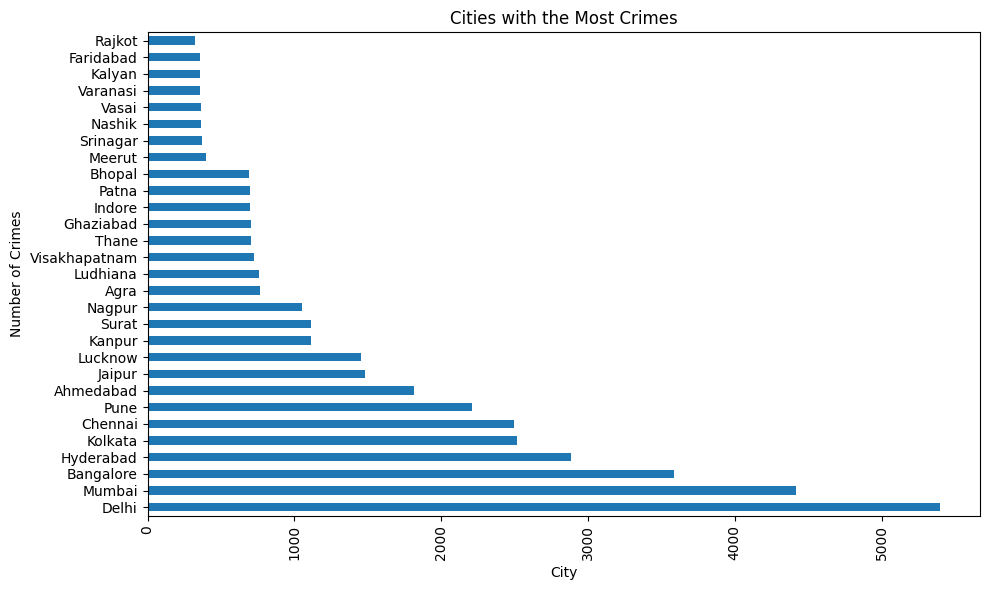

In [ ]:
city_crime_counts = df['City'].value_counts()

plt.figure(figsize=(10, 6))
city_crime_counts.plot(kind='barh')
plt.xlabel("City")
plt.ylabel("Number of Crimes")
plt.title("Cities with the Most Crimes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

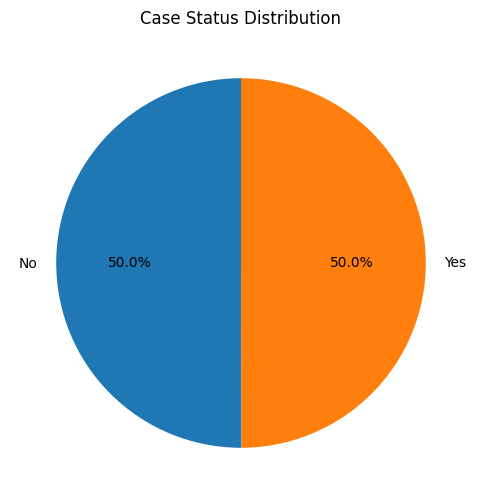

In [ ]:

status_counts = df['Case Closed'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Case Status Distribution')
plt.show()


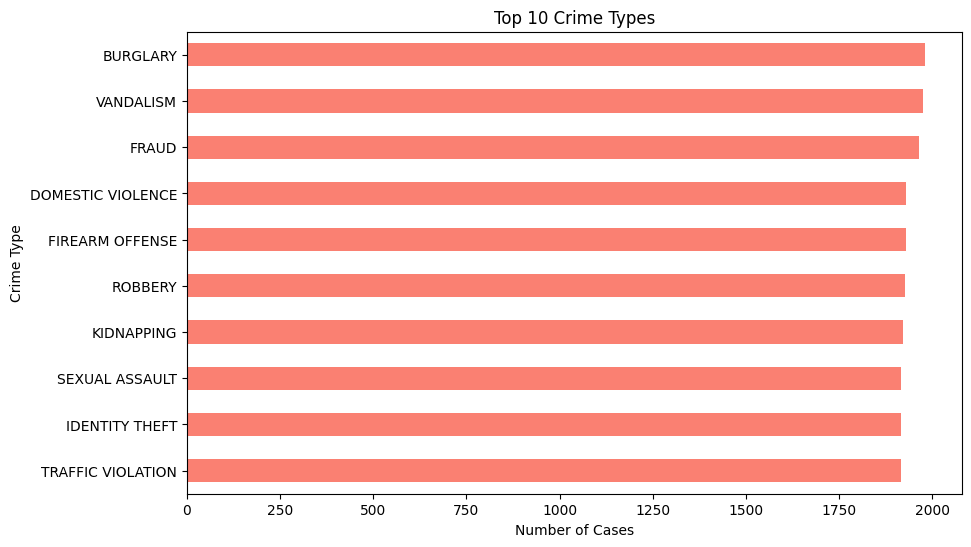

In [ ]:
top_crimes = df['Crime Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_crimes.plot(kind='barh', color='salmon')
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Cases')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.show()


In [ ]:

df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')
df['Victim Age'] = df['Victim Age'].astype(int, errors='ignore')

In [ ]:
df.groupby('City')['Crime Description'].count().sort_values(ascending=False)


,Crime Description
City,
Delhi,5398
Mumbai,4414
Bangalore,3587
Hyderabad,2880
Kolkata,2514
Chennai,2491
Pune,2210
Ahmedabad,1816
Jaipur,1479


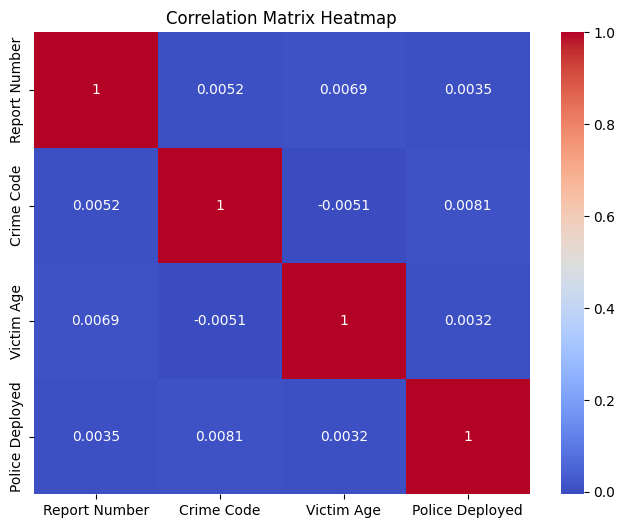

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
import numpy as np

# Before removing outliers
print("Before removing outliers:", df.shape)

# Calculate Q1 and Q3
Q1 = df['Victim Age'].quantile(0.25)
Q3 = df['Victim Age'].quantile(0.75)
IQR = Q3 - Q1

# Find lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Show outliers
outliers = df[(df['Victim Age'] < lower_bound) | (df['Victim Age'] > upper_bound)]
print("\nNumber of outliers detected:", outliers.shape[0])
print("Outlier values:\n", outliers['Victim Age'].unique())

# Remove outliers
df = df[(df['Victim Age'] >= lower_bound) & (df['Victim Age'] <= upper_bound)]

# After removing outliers
print("\nAfter removing outliers:", df.shape)


Before removing outliers: (40141, 14)

Number of outliers detected: 0
Outlier values:
 []

After removing outliers: (40141, 14)
